# Série temporal com Facebook Prophet - previsão de visualizações diárias de páginas web

 O Prophet é uma biblioteca de código aberto desenvolvida pelo Facebook para análise de séries temporais. Ela foi projetada para prever dados temporais, especialmente útil em casos como previsões de vendas, tráfego na web e outras aplicações que envolvem padrões temporais.

> **Vantagens**:


 > **Foco em Séries Temporais Diárias**:
 > O Prophet é otimizado para lidar com séries temporais diárias que exibem padrões sazonais em diferentes níveis, como feriados e eventos especiais.

  >**Componentes Aditivos**:
  >O modelo Prophet descreve as séries temporais como a soma de três componentes principais: tendência, sazonalidade e feriados. Isso permite que o modelo capture de maneira flexível uma ampla variedade de padrões temporais.

  >**Lida com Dados Ausentes**:
  >O Prophet é capaz de lidar com dados ausentes e outliers de forma robusta, tornando-o útil em situações do mundo real, onde os dados podem ser incompletos ou ruidosos.

  >**Inclusão de Feriados**:
  >A biblioteca permite a inclusão de feriados no modelo, permitindo que o algoritmo leve em consideração variações sazonais específicas de feriados.




## Instalação da biblioteca e importação da base de dados

- Visualizações diárias de uma página web da Wikipedia: https://en.wikipedia.org/wiki/Peyton_Manning

In [2]:
#!pip install pystan~=2.14
!pip install prophet

In [21]:
#!pip install convertdate
#!pip install lunarcalendar
#!pip install holidays==0.10.5

In [22]:
from prophet import Prophet
import pandas as pd

Este pacote é interessante utilizar uma base de dados muito grande.

In [23]:
dataset = pd.read_csv('/content/page_wikipedia.csv')
dataset

,date,views
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572
...,...,...
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871


In [6]:
dataset.describe()

,views
count,2905.000000
mean,8.138958
std,0.845957
min,5.262690
25%,7.514800
50%,7.997999
75%,8.580168
max,12.846747


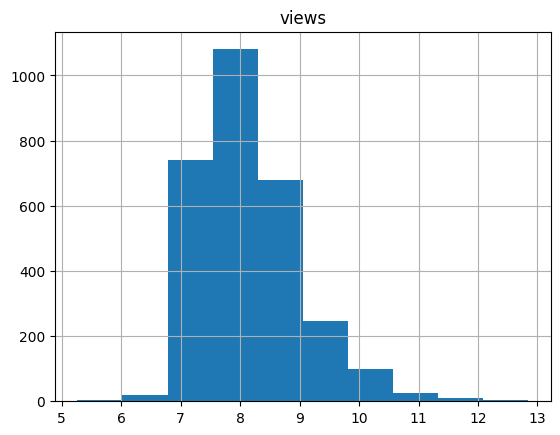

In [7]:
dataset.hist();

In [8]:
dataset = dataset[['date', 'views']].rename(columns = {'date': 'ds', 'views': 'y'}) # padronizar o nome área ser aceito pela biblioteca
dataset

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572
...,...,...
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871


In [9]:
dataset = dataset.sort_values(by = 'ds') #ordenando as datas
dataset

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572
...,...,...
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871


## Construção do modelo e previsões

In [10]:
model = Prophet()
model.fit(dataset)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbyse9eop/6qvr53at.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbyse9eop/b41jc5sd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28631', 'data', 'file=/tmp/tmpbyse9eop/6qvr53at.json', 'init=/tmp/tmpbyse9eop/b41jc5sd.json', 'output', 'file=/tmp/tmpbyse9eop/prophet_modelz7b0ynbl/prophet_model-20231121185452.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:54:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:54:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [11]:
future = model.make_future_dataframe(periods=90)# colocar periodo em dias
forecast = model.predict(future)

In [12]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2007-12-10,8.041704,8.240610,9.507773,8.041704,8.041704,0.802946,0.802946,0.802946,0.352288,0.352288,0.352288,0.450658,0.450658,0.450658,0.0,0.0,0.0,8.844650
1,2007-12-11,8.040157,7.971338,9.189635,8.040157,8.040157,0.553024,0.553024,0.553024,0.119636,0.119636,0.119636,0.433389,0.433389,0.433389,0.0,0.0,0.0,8.593182
2,2007-12-12,8.038611,7.745355,8.992602,8.038611,8.038611,0.350386,0.350386,0.350386,-0.066669,-0.066669,-0.066669,0.417055,0.417055,0.417055,0.0,0.0,0.0,8.388997
3,2007-12-13,8.037064,7.738460,8.949675,8.037064,8.037064,0.329846,0.329846,0.329846,-0.072254,-0.072254,-0.072254,0.402100,0.402100,0.402100,0.0,0.0,0.0,8.366910
4,2007-12-14,8.035517,7.736410,8.950737,8.035517,8.035517,0.319356,0.319356,0.319356,-0.069575,-0.069575,-0.069575,0.388931,0.388931,0.388931,0.0,0.0,0.0,8.354874


In [13]:
len(dataset), len(forecast)

(2905, 2995)

In [14]:
len(forecast) - len(dataset)

90

In [15]:
forecast.tail(90)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2905,2016-01-21,7.559905,7.936465,9.170176,7.559905,7.559905,0.999855,0.999855,0.999855,-0.072254,-0.072254,-0.072254,1.072109,1.072109,1.072109,0.0,0.0,0.0,8.559760
2906,2016-01-22,7.558883,7.991693,9.207768,7.558883,7.558883,1.016860,1.016860,1.016860,-0.069575,-0.069575,-0.069575,1.086435,1.086435,1.086435,0.0,0.0,0.0,8.575743
2907,2016-01-23,7.557862,7.726097,8.990027,7.557862,7.557862,0.786590,0.786590,0.786590,-0.311713,-0.311713,-0.311713,1.098303,1.098303,1.098303,0.0,0.0,0.0,8.344452
2908,2016-01-24,7.556840,8.098996,9.330263,7.556840,7.556840,1.155604,1.155604,1.155604,0.048287,0.048287,0.048287,1.107318,1.107318,1.107318,0.0,0.0,0.0,8.712445
2909,2016-01-25,7.555819,8.397861,9.601058,7.555819,7.555819,1.465356,1.465356,1.465356,0.352288,0.352288,0.352288,1.113068,1.113068,1.113068,0.0,0.0,0.0,9.021175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2990,2016-04-15,7.473079,6.333827,7.583317,7.448427,7.497886,-0.560878,-0.560878,-0.560878,-0.069575,-0.069575,-0.069575,-0.491303,-0.491303,-0.491303,0.0,0.0,0.0,6.912201
2991,2016-04-16,7.472058,6.092374,7.318044,7.446664,7.497519,-0.772927,-0.772927,-0.772927,-0.311713,-0.311713,-0.311713,-0.461214,-0.461214,-0.461214,0.0,0.0,0.0,6.699131
2992,2016-04-17,7.471036,6.467090,7.692589,7.445163,7.496902,-0.383237,-0.383237,-0.383237,0.048287,0.048287,0.048287,-0.431524,-0.431524,-0.431524,0.0,0.0,0.0,7.087799
2993,2016-04-18,7.470015,6.801679,8.042700,7.443066,7.496757,-0.050685,-0.050685,-0.050685,0.352288,0.352288,0.352288,-0.402973,-0.402973,-0.402973,0.0,0.0,0.0,7.419330


## Gráfico das previsões

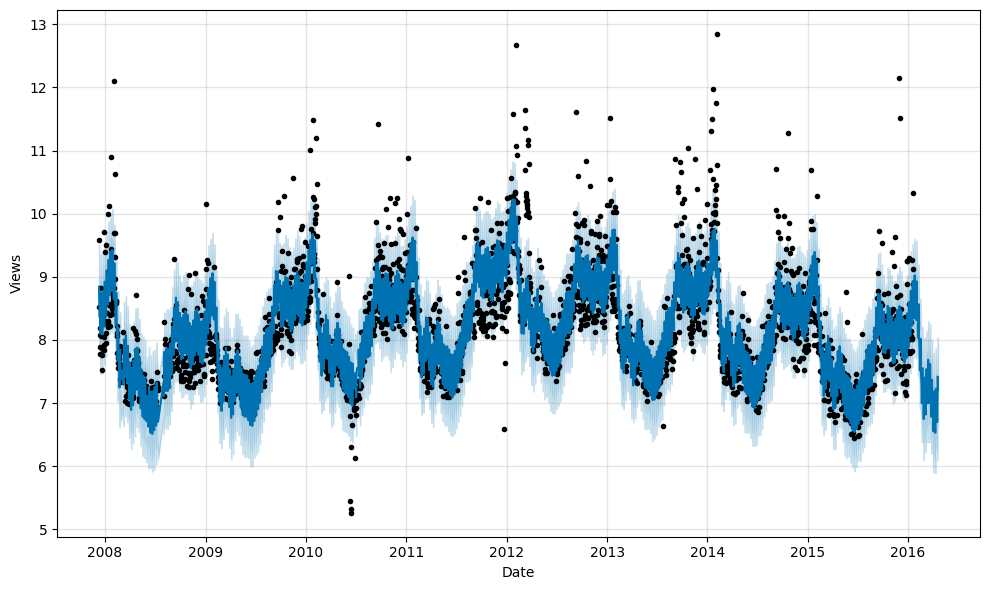

In [16]:
model.plot(forecast, xlabel = 'Date', ylabel = 'Views');

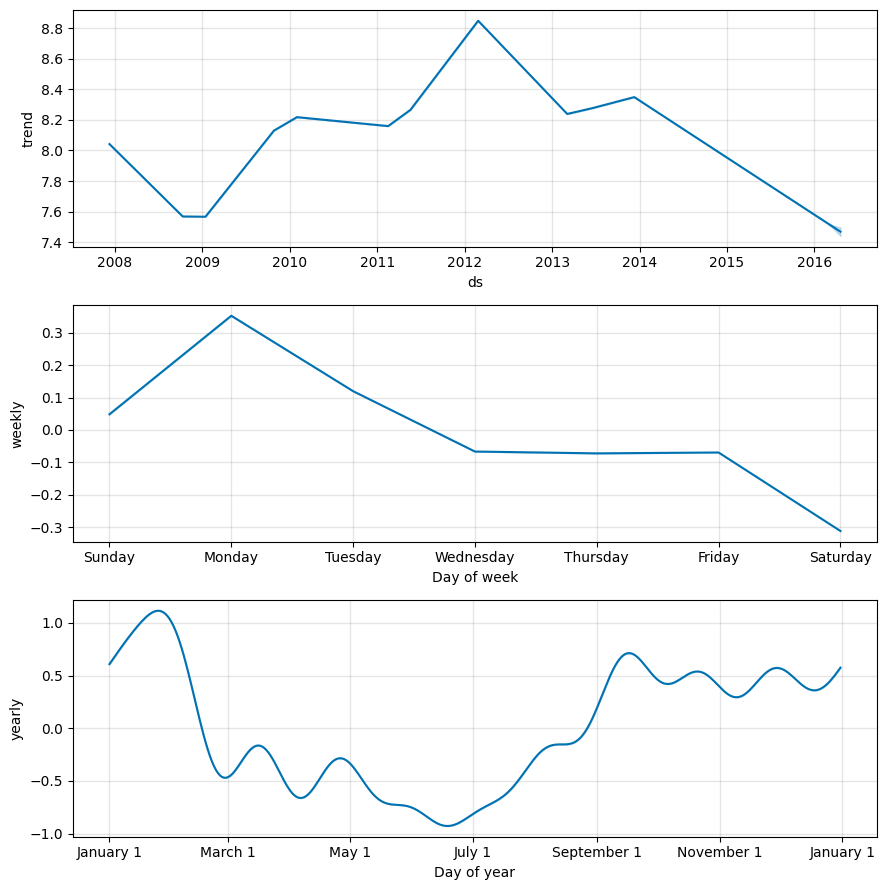

In [17]:
model.plot_components(forecast);

In [18]:
from prophet.plot import plot_plotly, plot_components_plotly

In [19]:
plot_plotly(model, forecast)

In [20]:
plot_components_plotly(model, forecast)